In [1]:
# load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
df.shape

(150, 6)

# Preprocessing

1. Missing Values
2. Duplicates
3. TypeCasting
4. Zero Variance
5. Outlier treatment
6. Dummy variables (optional)
7. Normalization (optional)

## 1. Missing Values

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 2. Duplicates

In [9]:
duplicate = df.duplicated()
sum(duplicate)

0

## 3. TypeCasting

In [10]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## 4. Zero Variance

In [19]:
df['SepalLengthCm'].var()


0.6856935123042507

## 5. Checking and Outlier Treatment

<Axes: >

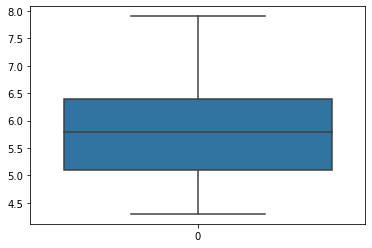

In [20]:
sns.boxplot(df.SepalLengthCm)

<Axes: >

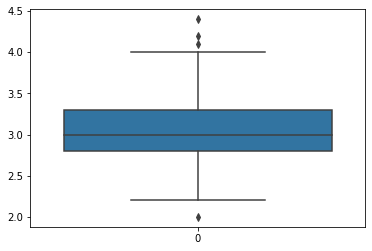

In [21]:
sns.boxplot(df.SepalWidthCm) ## outlier present

<Axes: >

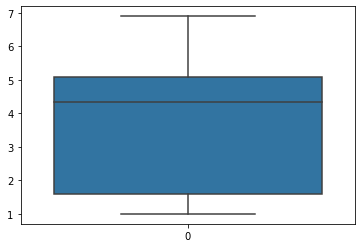

In [22]:
sns.boxplot(df.PetalLengthCm)

<Axes: >

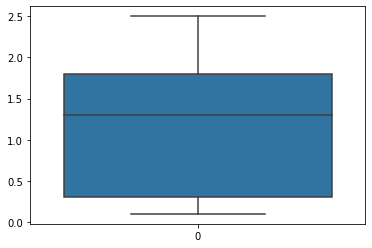

In [23]:
sns.boxplot(df.PetalWidthCm)

## Outlier Treatment

In [24]:
Q3 = df['SepalWidthCm'].quantile(0.75)
Q1 = df['SepalWidthCm'].quantile(0.25)

IQR = Q3 - Q1

upper_limit = Q3 + (IQR * 1.5)
lower_limit = Q1 - (IQR * 1.5)

In [25]:
outlier_df = np.where(df['SepalWidthCm'] > upper_limit, True, np.where(df['SepalWidthCm'] < lower_limit, True, False))
outlier_df

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [26]:
df_having_outliers = df.loc[(outlier_df), ]
df_having_outliers

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor


In [27]:
df = df.drop(df_having_outliers.index)

In [28]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 6. Dummy Variables

In [29]:
df_new = pd.get_dummies(df, drop_first = True)
df_new

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,False,False
1,2,4.9,3.0,1.4,0.2,False,False
2,3,4.7,3.2,1.3,0.2,False,False
3,4,4.6,3.1,1.5,0.2,False,False
4,5,5.0,3.6,1.4,0.2,False,False
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,True
146,147,6.3,2.5,5.0,1.9,False,True
147,148,6.5,3.0,5.2,2.0,False,True
148,149,6.2,3.4,5.4,2.3,False,True


In [30]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 7. Normalization


In [31]:
# Range converts to: 0 to 1
def norm_func(i): 
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [32]:
df_norm = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(norm_func)
df_norm

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.722222,0.067797,0.041667
1,0.166667,0.444444,0.067797,0.041667
2,0.111111,0.555556,0.050847,0.041667
3,0.083333,0.500000,0.084746,0.041667
4,0.194444,0.777778,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.444444,0.711864,0.916667
146,0.555556,0.166667,0.677966,0.750000
147,0.611111,0.444444,0.711864,0.791667
148,0.527778,0.666667,0.745763,0.916667


# Descriptive Statistics

In [33]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,76.582192,5.856849,3.036986,3.807534,1.219863
std,43.453305,0.834093,0.395145,1.757117,0.760365
min,1.000000,4.300000,2.200000,1.000000,0.100000
25%,40.250000,5.100000,2.800000,1.600000,0.300000
50%,77.500000,5.800000,3.000000,4.400000,1.300000
75%,113.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.000000,6.900000,2.500000


## 1. Value Count

In [34]:
df['Species'].value_counts()

Species
Iris-virginica     50
Iris-versicolor    49
Iris-setosa        47
Name: count, dtype: int64

## 2. Mean

In [37]:
df_mean = df['SepalWidthCm'].mean()
df_mean

3.036986301369863

## 3. Standard Deviation

In [40]:
df_std = df['SepalWidthCm'].std()
df_std

0.3951453156760289

## 4. Mode

In [41]:
df.Species.mode()

0    Iris-virginica
Name: Species, dtype: object

In [42]:
df_mode = df.mode()
df_mode

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.0,3.0,1.5,0.2,Iris-virginica
1,2,5.1,NaN,NaN,NaN,NaN
2,3,6.3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
141,146,NaN,NaN,NaN,NaN,NaN
142,147,NaN,NaN,NaN,NaN,NaN
143,148,NaN,NaN,NaN,NaN,NaN
144,149,NaN,NaN,NaN,NaN,NaN


## 5. IQR

In [43]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in columns:
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    print("IQR for", col, ":", IQR)


IQR for SepalLengthCm : 1.3000000000000007
IQR for SepalWidthCm : 0.5
IQR for PetalLengthCm : 3.4999999999999996
IQR for PetalWidthCm : 1.5


## 6. Variance

In [45]:
df_var = df['SepalWidthCm'].var()
df_var

0.15613982050070854

## 7. Skewness

In [47]:
df_skew = df['SepalWidthCm'].skew()
df_skew

0.14081170828794973

## 8. Kurtosis

In [49]:
df_kurt = df['SepalWidthCm'].kurtosis()
df_kurt

-0.24327514667496075

## 9. Group by Species

In [50]:
# group by Species

groupby_sum = df.groupby(['Species']).sum()
groupby_sum

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1192,233.9,158.2,68.8,11.5
Iris-versicolor,3714,291.8,136.5,209.5,65.3
Iris-virginica,6275,329.4,148.7,277.6,101.3


In [51]:
# group by Species

groupby_count = df.groupby(['Species']).count()
groupby_count

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,47,47,47,47,47
Iris-versicolor,49,49,49,49,49
Iris-virginica,50,50,50,50,50


In [52]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,146.000000,146.000000,146.000000,146.000000,146.000000,146
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,76.582192,5.856849,3.036986,3.807534,1.219863,NaN
std,43.453305,0.834093,0.395145,1.757117,0.760365,NaN
min,1.000000,4.300000,2.200000,1.000000,0.100000,NaN
25%,40.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,77.500000,5.800000,3.000000,4.400000,1.300000,NaN
75%,113.750000,6.400000,3.300000,5.100000,1.800000,NaN
